# STA410 Week 10 Homework 9 (4 points)

Due 12 PM Match 14 (before class starts)

1. **Paired or individual assignment.** Work may be shared within pairs without restriction, but collaborations beyond the pairs must be limited to "hints" and may not share complete solutions.


2. You are encouraged to adapt code you find available online **(including using AI chat bot suppport tools)** into your notebook; however, if you do so please provide a link to the utilized resource. ***If you don't and multiple students have the same answer an academic integrity proceeding may be undertaken.***  


3. **Library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Automated code tests that fail because of additional library imports will not recieve credit. Unless a problem instructs differently you may use any functions available from the Python stdlib and the libraries imported in the starter code.


<details><summary><span style="color: blue; text-decoration: underline; cursor: pointer;">Additional Details</span></summary>

> **Do not delete, replace, or rearranged cells.** This erases `cell ids` upon which automated code tests are based. The "Edit > Undo Delete Cells" option in the notebook editor might be helpful; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook). ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked. Due to potential problems with `cell ids` **the only environments supported in this class are** [UofT JupyterHub](https://datatools.utoronto.ca/) or [Google Colab](https://colab.research.google.com/)
>
> **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.
>
> **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors. ***Restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***

</details>


## Student and Contribution

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [ ]:
Partner = #None
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems?  
Assign one of the following into each of the `Contribution` variable below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [ ]:
Contribution = #"I worked alone"
# This cell will produce a runtime error until you assign a value to this variable

In [722]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

import torch


## Part 1: Review

---

### Coordinate Descent Review

---

**Coordinate descent** minimization of the quadratic function $f(x) = x^TAx + bx + c$ with **square symmetric positive definite** $A$ (such as $X^TX$) is equivalent to solving the linear $Ax = b$ problem using **Gauss-Seidel**.

- Minimization of the quadratic function $f(\beta) = \beta^T(X^TX+\lambda I )\beta - 2 X^Ty \beta$ for $\lambda > 0$ is equivalent to **ridge/Tikhonov regularization** solving $(X^TX+\lambda I ) \beta = X^Ty$

- Minimization of the nearly but not quite quadratic function $f(\beta) = \beta^TX^TX\beta - 2 X^Ty \beta + 2\lambda \sum_{i=1}^p |\beta_i|$ for $\lambda > 0$ is **lasso regularization** but has no equivalent linear $A\beta=b$ problem


---

### Gauss-Seidel and Nonlinear Gauss-Seidel "Review"

---

Using **coordinate descent** to minimize an arbitrary non quadratic function is called **nonlinear Gauss-Seidel** and solves $\nabla_\theta f(\theta)=0$ **nonlinear** equations as opposed to linear equations $A\theta=b$
by iteratively solving for $\theta_{i}^{(k+1)}$ via

$$ \displaystyle 0 = \frac{\partial}{\partial \theta_{j}}f(\theta^{(k+1)}_j,\cdots, \theta_{j-1}^{(k+1)}, \theta_{j}^{(k+1)}, \theta_{j+1}^{(k)},\cdots, \theta_{p}^{(k)})$$

The relative simplicity and well-behaved nature of solving **nonlinear** equations on the basis of cyclical iteration of univariate problems makes **nonlinear Gauss-Seidel** (**coordinate descent**) a fairly reliable method


In [2]:
p1q1 = "Coordinate descent solutions for ridge/Tikhonov regularization "+\
       "would be called <A|B|C|D>"
# A: Gauss-Seidel
# B: nonlinear Gauss-Seidel
# C: both A and B
# D: neigher A and B

p1q2 = "Coordinate descent solutions for lasso regularization "+\
       "would be called <A|B|C|D>"
# Use options above

---

### Norms (and Metrics) Review

---

The **lasso** provides $L_1$ and $L_2$ examples of $L_p$ **norms** (and **metrics**)

$
\begin{align*}
\underset{x}{\text{argmin }} ||b - Ax||_p &={} \underset{x}{\text{argmin }} \underset{L_p \text{ norm or }\Delta_p(b,Ax)\text{ metric}}{\left( \sum_{i=1}^n |b_i - A_{i\cdot}^Tx|^p \right)^{\frac{1}{p}}}\\ &\overset{p=2}{=}{} \underset{x}{\text{argmin }} \underset{1 \times 1}{\sqrt{(b - Ax)^T (b - Ax)}}\\
&\overset{p=1}{=}{} \underset{x}{\text{argmin }} \sum_{i=1}^n |b_i - A_{i\cdot}^Tx|
\end{align*}$

While the quadradic problem provides an example of the **elliptical norm** (often called **mahalanobis "distance"**)

$
\begin{align*}
\underset{x}{\text{argmin }} ||b - Ax||_2^{A^{-1}} &={} \underset{x}{\text{argmin }} \underset{1 \times 1: \text{ mahalanobis distance}}{(b - Ax)^T A^{-1} (b - Ax)} = \\
&={} \underset{x}{\text{argmin }} x^TAx - 2x^Tb + c
\end{align*}$

And **ridge/Tikhonov** provides can be expresssed in terms of $L_2$ **norms** but most simply seen as and $Ax=b$ problem resulting from an **eliptical norm**

$
\begin{align*}
\underset{\beta}{\text{argmin }} ||X^Ty - (X^TX+\lambda I)\beta ||_2^{(X^TX+\lambda I)^{-1}}
&={} \underset{\beta}{\text{argmin }} \underset{1 \times 1: \text{ mahalanobis distance}}{(X^Ty - (X^TX+\lambda I)\beta)^T (X^TX+\lambda I )^{-1} (X^Ty - (X^TX+\lambda I)\beta)} \\
&={} \underset{\beta}{\text{argmin }} \beta^T(X^TX+\lambda I)\beta  - 2\beta^TX^Ty
\end{align*}$




In [3]:
p1q3 = "Lasso regularization as exactly defined above "+\
       "would be expressed as <A|B|C|D>"
# Use options below

p1q4 = "Ridge/Tikhonov regularization as exactly defined above "+\
       "would be expressed as <A|B|C|D>"
# Use options below

A. $\quad||y-X\beta||_2^2 + \lambda ||\beta||_2^2$  

B. $\quad\frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_2^2$  

C. $\quad||y-X\beta||_2^2 + \lambda ||\beta||_1 $

D. $\quad\frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_1 $


---
### Loss, Penalty, and Cost functions "Review"
---

A **loss function** measures a distance between $y_i$ and a prediction of $\hat y_i = g_{\hat \theta}(\textbf{x}_i)$ of some  model based on estimated $\hat \theta$.

- $||y_i - \hat y_i||_2^2$ The **squared** $L_2$ norm of the $y_i - \hat y_i$ difference is a common **loss function** choice.

A **penalty function** is a measure of **complexity** for model parameter $\theta$ that is scaled by some **penalization term** $\lambda > 0$.

- $\lambda ||\theta||_p^p$ the $\lambda$ times the $L_p$ norm of $\theta$ raised to the $p^{th}$ power is a common **penality function** choice.

A **cost function** is the sum of the **loss functions** over all $i$ plus the **penality function**.

- Expressing this more generally for nonlinear $g_\theta$ this could be

  $$f(\theta) = \sum_{i=1}^n||y_i - g_\theta(\textbf{x}_i)||_2^2 + \lambda ||\theta||_p^p = ||y - g_\theta(X)||_2^2 + \lambda ||\theta||_p^p$$

In [4]:
p1q5 = "Is a 1/2 factor scaling the loss function "+\
       "crucially important for the cost function?"
# A: Yes, otherwise the lambda will not work
# B: Yes, but only for an L1 penalty
# C: Yes, but only for an L2 penalty
# D: No, it can be viewed already represented in the parameterization of lambda

p1q6 = "The loss function is a <A|B|C|D>"
# A: norm
# B: metric
# C: Both A and B
# D: Niether A nor B

p1q7 = "The cost function is a <A|B|C|D>"
# A: norm
# B: metric
# C: Both A and B
# D: Niether A nor B

p1q8 = "The penalty function is a <A|B|C|D>"
# A: norm
# B: metric
# C: Both A and B
# D: Niether A nor B

p1q9 = "The function being optimized is the <A|B|C|D>"
# A: loss function
# B: penalty function
# C: cost function
# D: None of the above

p1q10 = "The gradient of the cost function above is the <A|B|C|D>"
# A: sum of the loss and penalty functions
# B: sum of the gradients of the loss and penalty functions
# C: Niether A nor B
# D: some other function


---

### Gradients Review

---

The **gradient operator** $\nabla_{\theta}$ generalizes the **derivative** for scalar quantities as the vector of **partial derivatives** with respect to the input $\theta_i$ of its scalar valued multivariate function argument $f(\theta)$

$$ \nabla_{\theta}[f(\theta)] = \nabla_{\theta} f(\theta) = \frac{\partial f(\theta)}{\partial \theta_1} e_1 + \cdots + \frac{\partial f(\theta)}{\partial \theta_j} e_j + \cdots + \frac{\partial f(\theta)}{\partial \theta_n} e_n \quad \text{for }\textbf{standard basis vectors} \;e_j$$

The **derivative** and the **gradient operators** (functions of functions returning functions) are **linear**

$$\nabla_{\theta}(af(\theta)+bh(\theta)) = a\nabla_{\theta}f(\theta) + b\nabla_{\theta}h(\theta)$$


## Part 2 A: Gradient (Steepest Direction) Descent

---

For some **cost function** $f(\theta)$ **coordinate decent** "optimally" updates each $\theta_j^{(k+1)}$ based on solving $\frac{\partial f(\theta)}{\partial \theta_j} = 0$ which means updating $\theta^{(k+1)}$ only in the direction of $e_j$.

The **negative gradient**

$$ -\left[\nabla_{\theta} f(\theta)\right]\!(\theta^{(k)}) \; \text { evaluated at $\theta^{(k)} \quad $ which we write as } \; -\nabla_\theta f(\theta^{(k)})$$

is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of $f(\theta)$ at $\theta^{(k)}$.

Rather than "optimally" moving along a single coordinate direction $e_j$ to minimize (scalar valued multivariate) **cost function** $f(\theta)$, moving instead in the direction of the **negative gradient** $d^{(k)} = -\nabla_\theta f(\theta^{(k)})$ seems like an intuitive choice for efficiently updating $\theta^{(k+1)} = \theta^{(k)} +\alpha^{(k)}d^{(k)}$ along multiple coordinate axes simultaneously.

> Note that unlike **coordinate descent** this is not solving for "optimal" update such as $\displaystyle \min_{\alpha^{(k)}} f(\theta^{(k+1)} = \theta^{(k)} +\alpha^{(k)}d^{(k)})$ but rather is moving from $\theta^{(k)}$ in the direction $d^{(k)}$ to $\theta^{(k+1)}$ according to the (scalar) **step size** (or **learning rate**) parameter $\alpha^{(k)}$.


---

### Will this iterative method converge?
---
Suppose $\theta^*$ solves $\nabla_\theta f(\theta^*) = 0$ and consider

$\begin{align*}\require{cancel}
\theta^{(k+1)} - \theta^* &={} \theta^{(k)} -\alpha^{(k)} \nabla_\theta f(\theta^{(k)}) - \theta^*\\
&={} (\theta^{(k)} - \theta^*) - \alpha^{(k)} \nabla_\theta f(\theta^{(k)}) \\
& \quad {} \text{first order multivariate Taylor series approximation}\\
&\approx{} (\theta^{(k)} - \theta^*) - \alpha^{(k)} \nabla_\theta [ \cancel{f(\theta^*)}^0 + [\nabla_\theta f(\theta^*)]^T (\theta^{(k)} - \theta^*)]\\
&={} (I - \alpha^{(k)} \nabla_\theta  [\nabla_\theta f(\theta^*)]^T) (\theta^{(k)} - \theta^*) \\
&={} (I - \alpha^{(k)} \nabla_\theta  \nabla_\theta^T f(\theta^*)) (\theta^{(k)} - \theta^*)\\
&={} (I - \alpha^{(k)} H f(\theta^*))(\theta^{(k)} - \theta^*)\\
\end{align*}$

where $H f(\theta^*)$ is the **Hessian** of $f(\theta)$ evaluated at $\theta^*$.

And this will converge so long as $||\theta^{(k+1)} - \theta^*|| \leq ||(\theta^{(k)} - \theta^*)||$ which is possible if we are in the **radius of convergence** for **positive definite** $H f(\theta^*)$ since (where the intital approximation is sufficient)

$\begin{align*}
||\theta^{(k+1)} - \theta^*|| &\approx{} ||(I - \alpha^{(k)} H f(\theta^*))(\theta^{(k)} - \theta^*)||\\
& \quad \, {}^\text{$||Ax||_2\leq||A||\cdot ||x||_2$ for the $L_2$ induced matrix norm}\\
& \leq{} ||(I - \alpha^{(k)} H f(\theta^*))|| \cdot ||(\theta^{(k)} - \theta^*)|| \\
&= \underset{\text{largest singular value}}{\lambda^\max_{(I - \alpha^{(k)} H f(\theta^*))}} \times ||(\theta^{(k)} - \theta^*)||
\end{align*}$

and there will be a sufficiently small $\alpha^{(k)} > 0$ such that $\lambda^\max_{(I - \alpha^{(k)} H f(\theta^*))} < 1$.


---

> The [$L_2$ ***induced matrix norm***](https://en.wikipedia.org/wiki/Matrix_norm#Matrix_norms_induced_by_vector_norms) $\left|\left| A \right|\right|$ is the ***maximum singular value*** of $A$. If $A$ is positive definite, then all ***singular values*** $\lambda_\max > \cdots > \lambda_\min > 0$.
The ***singular values*** of $I-\alpha A$ [are](https://math.stackexchange.com/questions/1297419/eigenvalues-of-a-matrix-a-plus-ci-for-some-constant-c) $|1-\alpha \lambda_i|$ for $i=1, \cdots n$ so
> $$\text{if } \quad 0 < \alpha < \frac{2}{\lambda_\max} \quad \text{ then } \quad \left|\left| I - \alpha M \right|\right| < 1$$
>
> and $x^{(t)}$ converges to $x^*$. However, the **maximum singular value** $1-\alpha\lambda_\max=0$ for $\alpha = \frac{1}{\lambda_\max}$ is
>
> $$\left|\left|I - \alpha M\right|\right| = 1-\alpha\lambda_\min = 1 - \frac{\lambda_\min}{\lambda_\max} = 1 - \kappa^{-1}(M)$$
>
>  which is close to $1$ if the ***condition number*** of $M$ is large. Thus, if $\kappa(M)>>1$ then $x^{(t)}$ can converge to $x^*$ slowly since $\frac{||x^{(t+1)} - x^*||}{||x^{(t)} - x^*||^{\beta=1}} \leq \left|\left|I - \alpha M \right|\right| \approx 1$ does not guarantee better than very slow ***linear convergence***

---

---
### Part 2A Questions
---

1. For the quadratic function $f(\theta) = \frac{1}{2}(b - A \theta )^T A^{-1} (b - A \theta)$ with **square symmetric positive definite** $A$ (such as $A=X^TX$ and $b=X^Ty$) updating $\theta^{(k)}$ in the direction $\theta^{(k+1)} = \theta^{(k)} + \alpha \left[ - \nabla_{\theta} f(\theta^{(k)}) \right]$ is

    1. (A) $\quad \theta^{(k)} + \alpha^{(k)} (b - A\theta^{(k)})$
    2. (B) $\quad \theta^{(k)} - \alpha^{(k)} (b - A\theta^{(k)})$
    3. (C) $\quad \theta^{(k)} + \alpha^{(k)} (b - (A+ I)\theta^{(k)})$
    4. (D) $\quad \theta^{(k)} - \alpha^{(k)} (b - (A- I)\theta^{(k)})$


2. For quadratic function $f(\theta)$ of the previous problem if $b = A\theta^{(k)}$ then

    1. (A) $\quad \theta^{(k)}$ is at the minimum
    2. (B) $\quad \theta^{(k+1)}$ will not differ from $\theta^{(k)}$
    3. (C) $\quad$ both A and B are true
    4. (D) $\quad$ none of the above are true


3. For quadratic function $f(\theta)$ of the previous problems the $s$ sequential steps of $\theta^{(k+1)} = \theta^{(k)} + \alpha^{(k)} \left[ - \nabla_{\theta} f(\theta^{(k)}) \right]$ update operation (assuming $\nabla_{\theta} f(\theta^{(k)})$ is known analytically) is

    1. (A) $\quad O(sp^2)$ just as for **Guass-Seidel**
    2. (B) $\quad O(sp(p-m))$ as for **Guass-Seidel**
    3. (C) $\quad O(p^3)$ just as for **matrix inversion**
    4. (D) $\quad$ none of the above


4. For quadratic function $f(\theta)$ of the previous problems convergence <can|cannot> be guaranteed for some appropriate step size factors $\alpha^{(k)}>0$ assuring $f(\theta^{(k+1)}) < f(\theta^{(k)})$


5. For $\theta^*$ minimizing quadratic function $f(\theta)$ of the previous problems so $A\theta^*=b$ what (not necessarily scalar) $\alpha^{(k)}$ makes $\theta^{(k+1)} = \theta^*$ and hence shows that one step of **gradient descent** does not find $\theta^*$?

    1. (A) $\quad \alpha^{(k)} = 1$
    2. (B) $\quad \alpha^{(k)} = I$
    3. (C) $\quad \alpha^{(k)} = A^{-1}$
    4. (D) $\quad$ None of the above


6. What is the **Hessian** of the quadratic function $f(\theta)$ of the previous problems?

    1. (A) $\quad A$
    2. (B) $\quad A^{-1}$
    3. (C) $\quad \nabla_\theta^T\nabla_\theta f(\theta)$
    4. (D) $\quad$ None of the above


7. For a **ridge/Tikhonov cost function** $f(\beta)$ specified as $\frac{1}{2}||y-X\beta||_2^2 + \frac{1}{2}\lambda ||\beta||_2^2$ for $\lambda > 0$ **gradient descent** (steepest direction) updating $\beta^{(k+1)} = \beta^{(k)} + \alpha \left[ - \nabla_{\beta} f(\beta^{(k)}) \right]$ is

    1. (A) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)})$
    2. (B) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \beta^{(k)})$
    3. (C) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \times \text{sign}(\beta^{(k)}))$
    4. (D) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \beta^{(k)} - \lambda \times \text{sign}(\beta^{(k)}))$
    5. (E) $\quad$ None of the above
    

8. For a **lasso cost function** $f(\beta)$ specified as $\frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_1$ for $\lambda > 0$ **gradient descent** (steepest direction) updating $\beta^{(k+1)} = \beta^{(k)} + \alpha \left[ - \nabla_{\beta} f(\beta^{(k)}) \right]$ is

    1. (A) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)})$
    2. (B) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \beta^{(k)})$
    3. (C) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \times \text{sign}(\beta^{(k)}))$
    4. (D) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \beta^{(k)} - \lambda \times \text{sign}(\beta^{(k)}))$
    5. (E) $\quad$ None of the above


9. For a **elastic net cost function** $f(\beta)$ specified as $\frac{1}{2}||y-X\beta||_2^2 + \frac{1}{2}\lambda ||\beta||_2^2 + \lambda ||\beta||_1$ for $\lambda > 0$ **gradient descent** (steepest direction) updating $\beta^{(k+1)} = \beta^{(k)} + \alpha \left[ - \nabla_{\beta} f(\beta^{(k)}) \right]$ is

    1. (A) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)})$
    2. (B) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \beta^{(k)})$
    3. (C) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \times \text{sign}(\beta^{(k)}))$
    4. (D) $\quad \beta^{(k+1)} = \beta^{(k)} + \alpha^{(k)}(X^Ty - X^TX\beta^{(k)} - \lambda \beta^{(k)} - \lambda \times \text{sign}(\beta^{(k)}))$
    5. (E) $\quad$ None of the above


10. For $\hat y^{(k)} = g_{\hat \theta}^{(k)}(X)$ and **cost function** $\frac{1}{2} ||y-g_{\hat \theta}^{(k)}(X)||_2^2$ what is the **gradient descent** update $-\nabla_{\hat y^{(k)}} \frac{1}{2} ||y-g_{\hat \theta}^{(k)}(X)||_2^2$ with respect to $\hat y^{(k)}$ and the cooresponding **gradient boosting** update based on $b^{(k)}(X) \approx y - \hat y^{(k)}$?

    1. (A) $\quad \hat y^{(k)} + \alpha^{(k)}(y - \hat y^{(k)})$ and $g_{\hat \theta}^{(k+1)}(X) = g_{\hat \theta}^{(k)}(X) + \alpha^{(k)}b^{(k)}(X)$   
    2. (B) $\quad \hat y^{(k)} + \alpha^{(k)}(y - \hat y^{(k)})$ and $\hat y^{(k)} + \alpha^{(k)}(y - \hat y^{(k)})$
    3. (C) $\quad g_{\hat \theta}^{(k+1)}(X) = g_{\hat \theta}^{(k)}(X) + \alpha^{(k)}b^{(k)}(X)$ and $\hat y^{(k)} + \alpha^{(k)}(y - \hat y^{(k)})$  
    4. (D) $\quad g_{\hat \theta}^{(k+1)}(X) = g_{\hat \theta}^{(k)}(X) + \alpha^{(k)}b^{(k)}(X)$ and $g_{\hat \theta}^{(k+1)}(X) = g_{\hat \theta}^{(k)}(X) + \alpha^{(k)}b^{(k)}(X)$


In [5]:
p2q1 = "<A|B|C|D>"
p2q2 = "<A|B|C|D>"
p2q3 = "<A|B|C|D>"
p2q4 = "<can|cannot>"
p2q5 = "<A|B|C|D>"
p2q6 = "<A|B|C|D>"
p2q7 = "<A|B|C|D|E>"
p2q8 = "<A|B|C|D|E>"
p2q9 = "<A|B|C|D|E>"
p2q10 = "<A|B|C|D>"


---

## Part 2 B: Gradient Descent not Coordinate Descent


Complete the functions below for the given fixed scalar **step size** (**learning rate**) $\alpha^{(k)} = \alpha > 0$

- for a **ridge/Tikhonov cost function** $f(\beta) = \frac{1}{2}||y-X\beta||_2^2 + \frac{1}{2}\lambda ||\beta||_2^2$ for $\lambda > 0$
- for a **lasso cost function** $f(\beta) = \frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_1$ for $\lambda > 0$


In [723]:
mtcars = sm.datasets.get_rdataset("mtcars")
y = mtcars.data[['mpg']].values
y = y-y.mean()
X = mtcars.data[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']].values
X = (X-X.mean(axis=0))
X = X / (X**2).mean(axis=0)**0.5
model = sm.OLS(y,X); results = model.fit()
beta0 = results.summary2().tables[1].values[:,:1]
beta0

array([[-0.19588953],
       [ 1.626723  ],
       [-1.44967936],
       [ 0.4142235 ],
       [-3.57801491],
       [ 1.444047  ],
       [ 0.15763526],
       [ 1.23776483],
       [ 0.47595069],
       [-0.31702919]])

In [7]:
def fit_ridge_gradient_descent(X, y, beta0, lambda_,
                               alpha=0.0001, K=1000, epsilon=1e-10):
    '''
    Ridge Regression fitting using gradient not coordinate descent

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    beta0 [np.array shape=(p,1)]: initial value

    alpha   [float > 0]: scalar step size (learning rate) for gradient descent
    lambda_ [float > 0]: regularization hyperparameter:
                         the larger this value the greater the regularization
    K         [int > 0]: default 1000 maximum number of interations
    epsilon [float > 0]: trigger early stopping and return beta if
                         (beta-beta0).T.dot(beta-beta0) < epsilon

    returns Ridge regression beta-hat of yhat = X beta-hat
    '''

    beta = beta0.copy()
    for k in range(K):
        beta0 = beta.copy()
        beta = beta0  # Complete

        if (beta-beta0).T.dot(beta-beta0) < epsilon:
            return beta

    return beta

def fit_lasso_gradient_descent(X, y, beta0, lambda_,
                               alpha=0.0001, K=1000, epsilon=1e-10):
    '''
    Lasso Regression fitting using gradient not coordinate descent

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    beta0 [np.array shape=(p,1)]: initial value

    alpha   [float > 0]: scalar step size (learning rate) for gradient descent
    lambda_ [float > 0]: regularization hyperparameter:
                         the larger this value the greater the regularization
    K         [int > 0]: default 1000 maximum number of interations
    epsilon [float > 0]: trigger early stopping and return beta if
                         (beta-beta0).T.dot(beta-beta0) < epsilon

    returns Lasso regression beta-hat of yhat = X beta-hat
    '''

    beta = beta0.copy()
    for k in range(K):
        beta0 = beta.copy()
        beta = beta0  # Complete

        # Lasso optimally sets coefficients to zero during coordinate descent
        # so this will serve the analogous purpose for gradient descent
        # but in a Jacobi rather than Gauss-Seidel spirit of gradient descent
        zero = np.ones(beta0.shape)
        for j in range(len(beta0)):
            beta0 = beta.copy()
            beta0[j] = 0
            if np.abs((y-X@beta0).T.dot(X[:,j:(j+1)])[0,0]) <= lambda_:
                zero[j] = 0
        beta = beta*zero

        if (beta-beta0).T.dot(beta-beta0) < epsilon:
            return beta

    return beta


In [8]:
def get_trajectories(X, y, lambdas, fit_method, **kwargs):
    '''
    Lasso Regularization fits across regulation parameters

    X     [np.array shape=(n,p)]: mean 0 standard deviation 1 columns
    y     [np.array shape=(n,p)]: mean 0 column
    lambdas [np.array shape=(q)]: regularization hyperparameters with
                                  increasing lambdas (regularization strength)
                                  where 0 indicates no regulation and
                                  beta-hat is 0 for some large number
    fit_method        [function]: such as
                                  fit_lasso_gradient_descent or fit_lasso
                                  fit_ridge_gradient_descent or fit_ridge
    kwargs        [**dictionary]: passed to function as `**dictionary` such as
                                **{"alpha" :0.0001, "K": 1000, "epsilon": 1e-10}
                                  which may be forwareded to fit_method as
                                  fit_method(..., **kwargs) as below

    returns betas with betas.shape=(p,k+1) which are the regularization fits
            across the lambdas for fit_method from least to most regularization
    '''

    model = sm.OLS(y,X); results = model.fit()
    beta0 = results.summary2().tables[1].values[:,:1]
    betas = np.zeros((X.shape[1],1+len(lambdas)))
    betas[:,:1] = beta0.copy()  # make a copy for np.array
    # as opposed to `betas[:,:1] = beta0` which is a "reference"
    # otherwise changes in betas[:,:1] also change beta0

    for i in range(len(lambdas)):
        betas[:,i+1] = fit_method(X, y, betas[:,i].copy().reshape(betas.shape[0],1),
                                  lambdas[i], **kwargs).reshape(betas.shape[0],)
    return betas


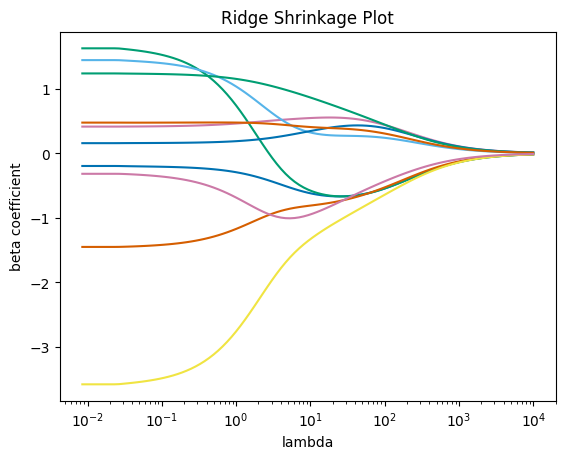

In [10]:
lambdas = np.logspace(-2, 4, 100)
# Use the default values for fit_ridge_gradient_descent, but this demonstrates kwargs
betas = get_trajectories(X, y, lambdas, fit_ridge_gradient_descent, **{"alpha":0.0001})
for i in range(betas.shape[0]):
    plt.plot(np.concatenate([np.array([lambdas[0] - (lambdas[1]-lambdas[0])]), lambdas]), betas[i,:])
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("beta coefficient")
plt.title("Ridge Shrinkage Plot");


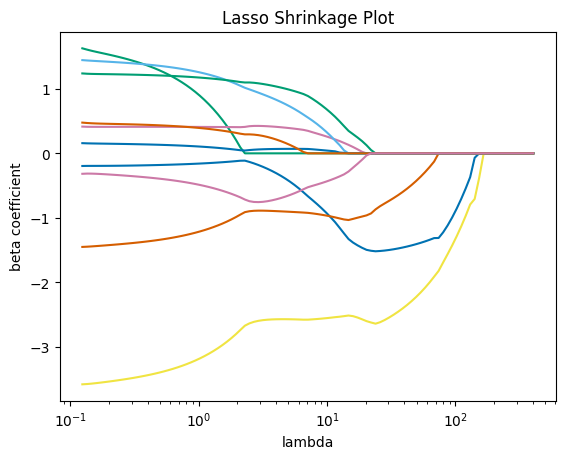

In [11]:
loglambdas = np.linspace(-2, 6, 100)
lambdas = np.exp(loglambdas)
# Use the default values for fit_ridge_gradient_descent, but this demonstrates kwargs
betas = get_trajectories(X, y, lambdas, fit_lasso_gradient_descent, **{"alpha":0.0001})
for i in range(betas.shape[0]):
    plt.plot(np.concatenate([np.array([lambdas[0] - (lambdas[1]-lambdas[0])]), lambdas]), betas[i,:])
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("beta coefficient")
plt.title("Lasso Shrinkage Plot");

## Part 3: Neural Networks and PyTorch

---

Minimize the **cost function** based on $L_p$ penalized squared $L_2$ loss  

$$||y_{n\times 1}-f_{A^{(1)},b^{(1)},A^{(2)},b^{(2)},\beta,\beta_0}(X_{n\times p})||_2^2 + \lambda_1 \sum_{ij} ||A^{(1)}_{ij}||_p + \lambda_2 \sum_{ij} ||A^{(2)}_{ij}||_p $$

by using **PyTorch** to perform **gradient descent** for the parameters $A^{(1)}_{p\times d}, b^{(1)}_{d_1 \times 1}, A^{(2)}_{d_1\times d_2}, b^{(2)}_{d_2 \times 1},\beta_{d_2 \times 1}$ and $\underset{1 \times 1}{\beta_0}$ of the model

$$\hat{y} = f_{A^{(1)}, b^{(1)}, A^{(2)}, b^{(2)},\beta,\beta_0}(X) = \big((X A^{(1)} + b^{(1)T})_+ A^{(2)} + b^{(2)T}\big)_+ \beta + \beta_0$$

where $(\cdot)_+$ is the so-called **ReLU nonlinear activation function** which sets all negative values within the object to $0$ and the $b^{(j)T}$ notation indicates adding the same row vector $b^{(j)T}$ to each row of the corresponding $n \times d_j$ matrix it is being added to.

- Each $A^{(j)}$ specifies a collection of **linear models** corresponding to the single **design matrix** it right-multiplies with the **coefficients** of each **linear model** given by the corresponding column of $A^{(j)}$ and element of $b^{(j)}$ (which represents the **intercept** of that model).

- Note that the **ReLU nonlinear activation function** is applied to each of the outputs of the $A^{(j)}$ models while the outputs of the final single linear model specifed by $\beta$ and $\beta_0$ are not adjusted.



---

The function $f$ above specifies the standard shallow vanilla three layer **neural network** which for each data point pair $y_i$ and $x_i = X_{i\cdot}^T = z^{(1)}_i$ is an alternating sequence of **affine transformations** $A^{(j)}z^{(j)}_i + b^{(j)}$ and [elementwise](https://math.stackexchange.com/questions/2324764/notation-for-element-wise-function-application) applications of **nonlinear ReLU activation functions** $q^{(j)}\circ (A^{(j)}z_j + b^{(j)})$ concluding with a final identity (linear non transformation) function.


A **deep neural network** is the extension of such sequence of alternating applications of (a) affine transformations and (b) elementwise activation function transformations of the previous affine transformation for some large $K$

$$q_K \circ (A_K \{ \cdots \{q_2 \circ (A_2\{q_1 \circ (A_1x + b_1)\} + b_2)\} \cdots \} + b_K)$$

with only $q_K$ possibly being the identity (linear non transformation) function (for the purposes of **regression** as $f$ above demonstrates).

The **architecture** of a **neural network** refers to the details of the specification above and any extensions beyond this form (increasing sophistication and extending behavioral capability for various purposes).

Optimization of **deep neural network** can proceed on the basis  **gradient descent** which given the "functions of functions of functions..." nature of the specification will be a product of a sequence of partial derivatives as given by the **chain rule**. The so-called **forward pass** and **backpropegation** algorithm [to be discussed later] can automatically produce this sequence and product of partial derivatives. A key challange in this approach is that if the product of the many partial derivatives **vanishes** to zero then there is no **gradient** (or rather the **gradient** is $0$) and the algorithm no longer moves.

1. The introduction of **ReLU activation functions** greatly facilitated the use of **deep neural network architectures** by mitigating the **vanishing gradients** probelm through their substituition in place of the **vanishing gradients** prone **inverse-logit (sigmoid) activation functions**.

2. A more recent advance is the use of **batch norm** which encourages more **isotropically** behaved optimization surfaces that that are very well-suited to optimization using **gradient descent** and its more advanced augmentations [to be discussed later].

**Deep neural networks** are the most flexible **universal** function approximation methodology available today. The https://arogozhnikov.github.io/3d_nn/ website has a visualization that suggests how flexible and powerful these are by animating how they increases accross the input space. Some good resources to continue learning about **deep neural network** are the [deep learning](https://www.deeplearningbook.org/) and [dive into deep learning](https://d2l.ai/) textbooks.


In [141]:
# Complete `relu`, `squaredL2`, `L2_penalty`,`L1_penalty`, and `f()`
# functions below and correctly compute `y_hat` and `cost`
# given the initializations in the next cell

# For `lambda_1,lambda_2 = 0,0` and `alpha = 0.0001`
# Minimum K required to achieve a prediction error squared loss of less than 50
p3q1 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#NA

# For `lambda_1,lambda_2 = 0,0` and `alpha = 0.00005`
# Minimum K required to achieve a prediction error squared loss of less than 50
p3q2 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#6000

# For `lambda_1,lambda_2 = 0,0` and `alpha = 0.000025`
# Minimum K required to achieve a cost of less than 50
p3q3 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#8000

# For `lambda_1,lambda_2 = 1,1` and `alpha = 0.00005` and the L2 penalties
# Minimum K required to achieve a prediction error squared loss of less than 50
p3q4 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#4000

# For `lambda_1,lambda_2 = 1,1` and `alpha = 0.00005` and the L1 penalties
# Minimum K required to achieve a prediction error squared loss of less than 50
p3q5 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#6000

# Now for the `mtcars` data set and initialization given below...

# For `lambda_1,lambda_2 = 0,0` and `alpha = 0.00005`
# Minimum K required to achieve an
# out of sample prediction error squared loss of less than 100
p3q6 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#NA

# For `lambda_1,lambda_2 = 10,10` and `alpha = 0.00005` and the L2 penalties
# Minimum K required to achieve an
# out of sample prediction error squared loss of less than 100
p3q7 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#4000

# For `lambda_1,lambda_2 = 100,100` and `alpha = 0.00005` and the L2 penalties
# Minimum K required to achieve an
# out of sample prediction error squared loss of less than 100
p3q8 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#2000

# For `lambda_1,lambda_2 = 100,100` and `alpha = 0.00005` and the L1 penalties
# Minimum K required to achieve an
# out of sample prediction error squared loss of less than 100
p3q9 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#2000

# For `lambda_1,lambda_2 = 100,100` and `alpha = 0.000025` and the L1 penalties
# Minimum K required to achieve an
# out of sample prediction error squared loss of less than 50
p3q10 = "<2000|4000|6000|8000|NA>"  # Use NA if not possible for given options
#NA


In [722]:
np.random.seed(410)

n,p,d1,d2 = 100,15,10,5
X = torch.tensor(np.random.normal(size=(n,p)), requires_grad=False)
y = torch.tensor(np.random.normal(size=(n,1)), requires_grad=False)

A1 = torch.tensor(np.random.normal(size=(p,d1)), requires_grad=True)
b1 = torch.tensor(np.random.normal(size=(d1,1)), requires_grad=True)
A2 = torch.tensor(np.random.normal(size=(d1,d2)), requires_grad=True)
b2 = torch.tensor(np.random.normal(size=(d2,1)), requires_grad=True)
beta = torch.tensor(np.random.normal(size=(d2,1)), requires_grad=True)
beta0 = torch.tensor(np.random.normal(size=(1,1)), requires_grad=True)
A1,b1,A2,b2,beta,beta0

In [ ]:
# The following are all one liners based on
f# only `.T` and `@` and `torch.` functions
def relu(Z):
    pass  # Complete

def squaredL2(eps):
    pass  # Complete

def L1_penalty(A):
    pass  # Complete

def L2_penalty(A):
    pass  # Complete

def f(X):
    pass  # Complete


In [722]:
alpha,K = 0.0001,2000
lambda_1,lambda_2 = 0,0
progress = np.zeros(K)
for k in range(K):

    y_hat = f(X)
    cost = 0  # Complete

    cost.backward()
    # defines A1.grad, b1.grad, A2.grad, b2.grad
    # with respect to all prior computations

    # do no count these computations towards the gradient
    with torch.no_grad():

        # gradient descent
        A1.data -= alpha*A1.grad
        b1.data -= alpha*b1.grad
        A2.data -= alpha*A2.grad
        b2.data -= alpha*b2.grad
        beta.data -= alpha*beta.grad
        beta0.data -= alpha*beta0.grad

        # reset the gradients
        A1.grad.zero_()
        b1.grad.zero_()
        A2.grad.zero_()
        b2.grad.zero_()
        beta.grad.zero_()
        beta0.grad.zero_()

    progress[k] = squaredL2(y-f(X))

plt.plot(progress[10:]);

In [722]:
plt.plot(f(X).detach().numpy().flatten(), y.numpy().flatten(), '.')
plt.title("Squared L2 Loss "+str(progress[-1]));

In [722]:
mtcars = sm.datasets.get_rdataset("mtcars")
y_ = mtcars.data[['mpg']].values
y_ = y_-y_.mean()
X_ = mtcars.data[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']].values
X_ = (X_-X_.mean(axis=0))
X_ = X_ / (X_**2).mean(axis=0)**0.5

print(X.shape)

n,p,d1,d2 = 20,10,5,5
X = torch.tensor(X_[:n,:], requires_grad=False)
y = torch.tensor(y_[:n], requires_grad=False)
X_ = torch.tensor(X_[n:,:], requires_grad=False)
y_ = torch.tensor(y_[n:], requires_grad=False)

np.random.seed(410)

A1 = torch.tensor(np.random.normal(size=(p,d1)), requires_grad=True)
b1 = torch.tensor(np.random.normal(size=(d1,1)), requires_grad=True)
A2 = torch.tensor(np.random.normal(size=(d1,d2)), requires_grad=True)
b2 = torch.tensor(np.random.normal(size=(d2,1)), requires_grad=True)
beta = torch.tensor(np.random.normal(size=(d2,1)), requires_grad=True)
beta0 = torch.tensor(np.random.normal(size=(1,1)), requires_grad=True)
A1,b1,A2,b2,beta,beta0

In [722]:
alpha,K = 0.00005,2000
lambda_1,lambda_2 = 0,0
progress = np.zeros(K)
performance = np.zeros(K)
for k in range(K):

    y_hat = f(X)
    cost = 0  # Complete

    cost.backward()
    # defines A1.grad, b1.grad, A2.grad, b2.grad
    # with respect to all prior computations

    # do no count these computations towards the gradient
    with torch.no_grad():

        # gradient descent
        A1.data -= alpha*A1.grad
        b1.data -= alpha*b1.grad
        A2.data -= alpha*A2.grad
        b2.data -= alpha*b2.grad
        beta.data -= alpha*beta.grad
        beta0.data -= alpha*beta0.grad

        # reset the gradients
        A1.grad.zero_()
        b1.grad.zero_()
        A2.grad.zero_()
        b2.grad.zero_()
        beta.grad.zero_()
        beta0.grad.zero_()

    progress[k] = squaredL2(y-f(X))
    performance[k] = squaredL2(y_-f(X_))

plt.plot(progress[10:], label="in sample")
plt.plot(performance[10:], label="out of sample")
plt.legend();

In [722]:
min(performance)

In [722]:
plt.plot(f(X).detach().numpy().flatten(), y.numpy().flatten(), '.',
         label = "In sample squared L2 Loss\n"+str(progress[-1]))
plt.plot(f(X_).detach().numpy().flatten(), y_.numpy().flatten(), '.',
         label = "Out of sample squared L2 Loss\n"+str(performance[-1]))
plt.legend();